<a href="https://colab.research.google.com/github/manegene/Cat-and-Dog-Classifier/blob/main/Copy_of_fcc_cat_dog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
try:
  # This command only in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D,Input,BatchNormalization,GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [24]:
# Get project files
!wget https://cdn.freecodecamp.org/project-data/cats-and-dogs/cats_and_dogs.zip

!unzip cats_and_dogs.zip

PATH = 'cats_and_dogs'

train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')
test_dir = os.path.join(PATH, 'test')

# Get number of files in each directory. The train and validation directories
# each have the subdirecories "dogs" and "cats".
total_train = sum([len(files) for r, d, files in os.walk(train_dir)])
total_val = sum([len(files) for r, d, files in os.walk(validation_dir)])
total_test = sum([len(os.listdir(test_dir))])

#add test images to a dataframe since test directory has no sub-directories and flow_from_directory require sub-folders
test_df = pd.DataFrame({'filename': os.listdir(test_dir)})
print(test_df.head())

# Variables for pre-processing and training.
batch_size = 128
epochs = 25
IMG_HEIGHT = 160
IMG_WIDTH = 160


#print("Does test_dir exist?:", os.path.exists(test_dir))
#print("Contents of test_dir:", os.listdir(test_dir) if os.path.exists(test_dir) else "Directory does not exist")
print("Total training images:", total_train)
print("Total validation images:", total_val)
print("Total test images:", total_test)


Streaming output truncated to the last 5000 lines.
  inflating: cats_and_dogs/train/dogs/dog.858.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.858.jpg  
  inflating: cats_and_dogs/train/dogs/dog.680.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.680.jpg  
  inflating: cats_and_dogs/train/dogs/dog.694.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.694.jpg  
  inflating: cats_and_dogs/train/dogs/dog.864.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.864.jpg  
  inflating: cats_and_dogs/train/dogs/dog.870.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.870.jpg  
  inflating: cats_and_dogs/train/dogs/dog.871.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.871.jpg  
  inflating: cats_and_dogs/train/dogs/dog.865.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.865.jpg  
  inflating: cats_and_dogs/train/dogs/dog.695.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.695.jpg  
  inflating: cats_and_dogs/tr

In [25]:
# 3
train_image_generator = ImageDataGenerator(rescale=1./255,
                                           rotation_range=40,  # Randomly rotate images
                                            width_shift_range=0.2,  # Randomly shift width
                                            height_shift_range=0.2,  # Randomly shift height
                                            shear_range=0.2,  # Apply shearing
                                            zoom_range=0.2,  # Apply zoom
                                            horizontal_flip=True,  # Flip images horizontally
                                            brightness_range=[0.8, 1.2],  # Randomly adjust brightness
                                            fill_mode='nearest')  # Fill in missing pixels)
validation_image_generator = ImageDataGenerator(rescale=1./255)
test_image_generator = ImageDataGenerator(rescale=1./255)


train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                            directory=train_dir,
                                                            target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                            class_mode='binary')

val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                               directory=validation_dir,
                                                               target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                               class_mode='binary')
#here we use the test dataframe
test_data_gen = test_image_generator.flow_from_dataframe(batch_size=batch_size,
                                                         dataframe=test_df,
                                                         x_col='filename',
                                                         y_col=None,
                                                         directory=test_dir,
                                                         target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                         class_mode=None,
                                                         shuffle=False)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 50 validated image filenames.


/usr/local/lib/python3.11/dist-packages/keras/src/legacy/preprocessing/image.py:920: UserWarning: Found 1 invalid image filename(s) in x_col="filename". These filename(s) will be ignored.
  warnings.warn(


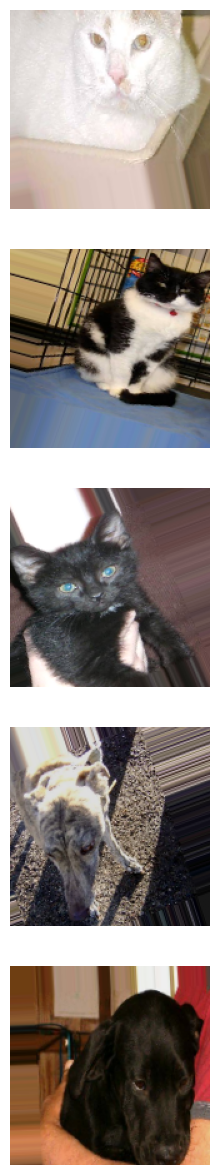

In [26]:
# 4
def plotImages(images_arr, probabilities = False):
    fig, axes = plt.subplots(len(images_arr), 1, figsize=(5,len(images_arr) * 3))
    if probabilities is False:
      for img, ax in zip( images_arr, axes):
          ax.imshow(img)
          ax.axis('off')
    else:
      for img, probability, ax in zip( images_arr, probabilities, axes):
          ax.imshow(img)
          ax.axis('off')
          if probability > 0.5:
              ax.set_title("%.2f" % (probability*100) + "% dog")
          else:
              ax.set_title("%.2f" % ((1-probability)*100) + "% cat")
    plt.show()

sample_training_images, _ = next(train_data_gen)
plotImages(sample_training_images[:5])


In [27]:
# 5
train_image_generator = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    brightness_range=[0.8, 1.2],
    fill_mode='nearest'
)

Found 2000 images belonging to 2 classes.


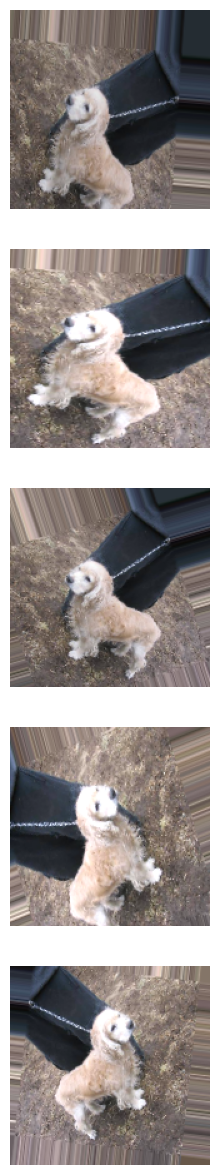

In [28]:
# 6
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')

augmented_images = [train_data_gen[0][0][0] for i in range(5)]

plotImages(augmented_images)

In [29]:
#adopt a trainable model instead of training  a new one
base_model = tf.keras.applications.MobileNetV2(input_shape=(IMG_HEIGHT, IMG_WIDTH, 3),
                                               include_top=False,
                                               weights='imagenet')

base_model.trainable = False  # Freeze base layers

In [31]:
# 7
#model =base_model #Sequential([
        #base_model,
#do not train pre-trained model, instead use the pre-trained model.
    #Input(shape=(IMG_HEIGHT, IMG_WIDTH, 3)),

    #Conv2D(32, (3,3), activation='relu', padding='same'),
    #BatchNormalization(),
    #MaxPooling2D(2,2),

    #Conv2D(64, (3,3), activation='relu', padding='same'),
    #BatchNormalization(),
    #MaxPooling2D(2,2),

    #Conv2D(128, (3,3), activation='relu', padding='same'),
    #BatchNormalization(),
    #MaxPooling2D(2,2),

    #Conv2D(256, (3,3), activation='relu', padding='same'),
    #BatchNormalization(),
    #MaxPooling2D(2,2),

    #Flatten(),
    #Dense(512, activation='relu'),
    #Dropout(0.5),  # Dropout to prevent overfitting
    #Dense(256, activation='relu'),
    #Dropout(0.5),
    #Dense(1, activation='sigmoid')  # Binary classification
#])
#initial_lr = 0.001
'''lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=initial_lr,
    decay_steps=1000,
    decay_rate=0.96,
    staircase=True
)'''
# Define the full model
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),  # Convert feature maps to a single vector
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification output
])
optimizer_setting = tf.keras.optimizers.Adam(1e-5)

model.compile(optimizer=optimizer_setting, loss='binary_crossentropy', metrics=['accuracy'])

In [32]:
# 8
history = model.fit(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
15/15 ━━━━━━━━━━━━━━━━━━━━ 89s 6s/step - accuracy: 0.5538 - loss: 0.8307 - val_accuracy: 0.5792 - val_loss: 0.6408
Epoch 2/25
 1/15 ━━━━━━━━━━━━━━━━━━━━ 40s 3s/step - accuracy: 0.5391 - loss: 0.7979

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


15/15 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.5391 - loss: 0.7979 - val_accuracy: 0.5982 - val_loss: 0.6231
Epoch 3/25
15/15 ━━━━━━━━━━━━━━━━━━━━ 117s 5s/step - accuracy: 0.5830 - loss: 0.7579 - val_accuracy: 0.6975 - val_loss: 0.5628
Epoch 4/25
15/15 ━━━━━━━━━━━━━━━━━━━━ 41s 3s/step - accuracy: 0.6250 - loss: 0.6785 - val_accuracy: 0.7020 - val_loss: 0.5612
Epoch 5/25
15/15 ━━━━━━━━━━━━━━━━━━━━ 142s 9s/step - accuracy: 0.5787 - loss: 0.7729 - val_accuracy: 0.8080 - val_loss: 0.5027
Epoch 6/25
15/15 ━━━━━━━━━━━━━━━━━━━━ 40s 3s/step - accuracy: 0.6250 - loss: 0.6816 - val_accuracy: 0.8080 - val_loss: 0.4967
Epoch 7/25
15/15 ━━━━━━━━━━━━━━━━━━━━ 83s 6s/step - accuracy: 0.6421 - loss: 0.6604 - val_accuracy: 0.8415 - val_loss: 0.4608
Epoch 8/25
15/15 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.6500 - loss: 0.6438 - val_accuracy: 0.8616 - val_loss: 0.4465
Epoch 9/25
15/15 ━━━━━━━━━━━━━━━━━━━━ 117s 5s/step - accuracy: 0.6677 - loss: 0.6197 - val_accuracy: 0.8772 - val_loss: 0.4218


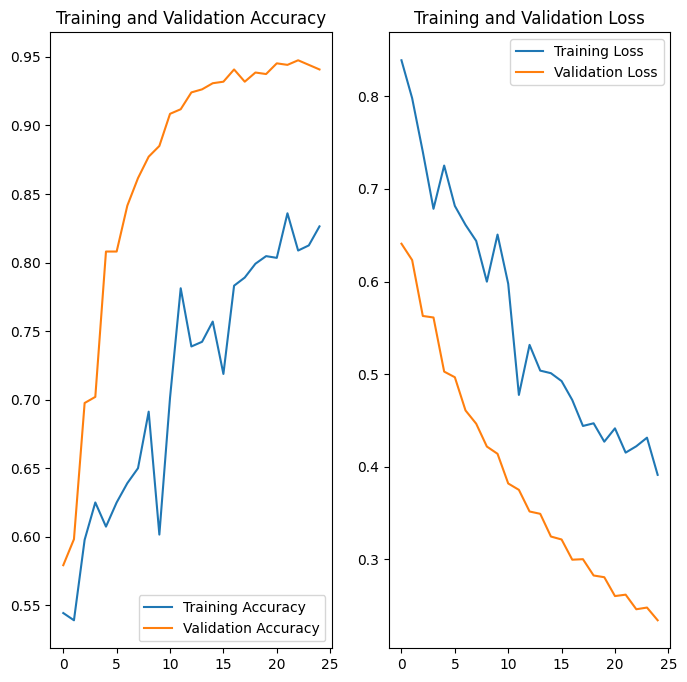

In [33]:
# 9
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [36]:
# 10
test_data_gen.reset()
probabilities = model.predict(test_data_gen).flatten()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


In [37]:
# 11
answers =  [1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
            1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
            1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
            1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
            0, 0, 0, 0, 0, 0]

correct = 0

for probability, answer in zip(probabilities, answers):
  if round(probability) == answer:
    correct +=1

percentage_identified = (correct / len(answers)) * 100

passed_challenge = percentage_identified >= 63

print(f"Your model correctly identified {round(percentage_identified, 2)}% of the images of cats and dogs.")

if passed_challenge:
  print("You passed the challenge!")
else:
  print("You haven't passed yet. Your model should identify at least 63% of the images. Keep trying. You will get it!")

Your model correctly identified 54.0% of the images of cats and dogs.
You haven't passed yet. Your model should identify at least 63% of the images. Keep trying. You will get it!
